# Implementation and Visualization of a Perceptron

This notebook implements and visualizes the training of a perceptron which classifies a 2D model.
Part of the code comes from an exercise in the Udacity Deep Learning Nanodegree.

In [159]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [160]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [161]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [162]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y_hat != y[i]:
            if y_hat == 0:
                # prediction == 0 -> target == 1
                W[0] = W[0] + learn_rate*X[i][0]
                W[1] = W[1] + learn_rate*X[i][1]
                b = b + learn_rate
            else:
                # prediction == 1 -> target == 0
                W[0] = W[0] - learn_rate*X[i][0]
                W[1] = W[1] - learn_rate*X[i][1]
                b = b - learn_rate
    return W, b

In [163]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 10):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    weight_values = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        # W1x1 + W2x2 + b = 0 -> x2 = -(W1/W2)x1 - (b/W2) ~ y = mx + b
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        weight_values.append((W[0], W[1], b))
    return boundary_lines
    #return weight_values

In [164]:
import pandas as pd

In [165]:
data = pd.read_csv('data.csv', sep = ',', header=None)

In [166]:
X = data.to_numpy()
y = X[:,2]
X = X[:,0:2]

In [167]:
boundary_lines = trainPerceptronAlgorithm(X, y)

In [168]:
from matplotlib import pyplot as plt
%matplotlib inline

In [169]:
X_0 = []
X_1 = []
for i in range(len(y)):
    if y[i] == 0:
        X_0.append(X[i])
    else:
        X_1.append(X[i])
X_0 = np.array(X_0)
X_1 = np.array(X_1)

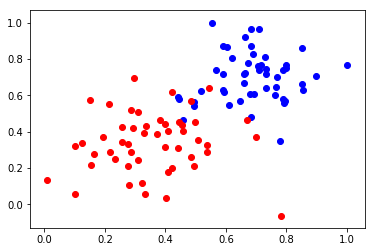

In [170]:
plt.scatter(X_0[:,0],X_0[:,1],color='blue')
plt.scatter(X_1[:,0],X_1[:,1],color='red')
my_plot = plt.gca()
my_plot.xaxis

In [171]:
boundary_lines

[(array([-0.05239463]), array([-2.04919443])),
 (array([1.23772563]), array([-2.90815949])),
 (array([-39.47663703]), array([23.57864461])),
 (array([-13.13237331]), array([7.06473087])),
 (array([-9.11612538]), array([4.57527519])),
 (array([-7.79056954]), array([3.96940892])),
 (array([-6.7750263]), array([3.50523881])),
 (array([-5.97212608]), array([3.13826056])),
 (array([-5.32141098]), array([2.84084093])),
 (array([-4.78335796]), array([2.59491529]))]

In [172]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display_boundary(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

def display_boundaries(boundary_lines):
    for i in range(len(boundary_lines)):
        display_boundary(boundary_lines[i][0], boundary_lines[i][1])

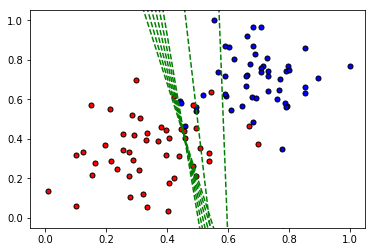

In [173]:
plot_points(X, y)
display_boundaries(boundary_lines)